## 1. Imports


In [1]:
# Notebook: EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Dataset Visualizations

In [2]:
# Load CSVs
df_train = pd.read_csv('../data/raw/sign_mnist_train.csv')
df_test = pd.read_csv('../data/raw/sign_mnist_test.csv')

df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


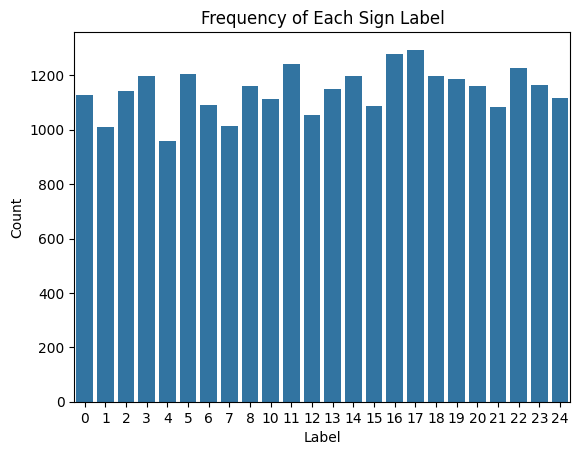

In [ ]:
# Check class distribution

sns.countplot(x='label', data=df_train)
plt.title("Frequency of Each Sign Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Displays how frequent each data value appears in the dataset. No need for sampling techniques as the lables are mainly evenly distributed.

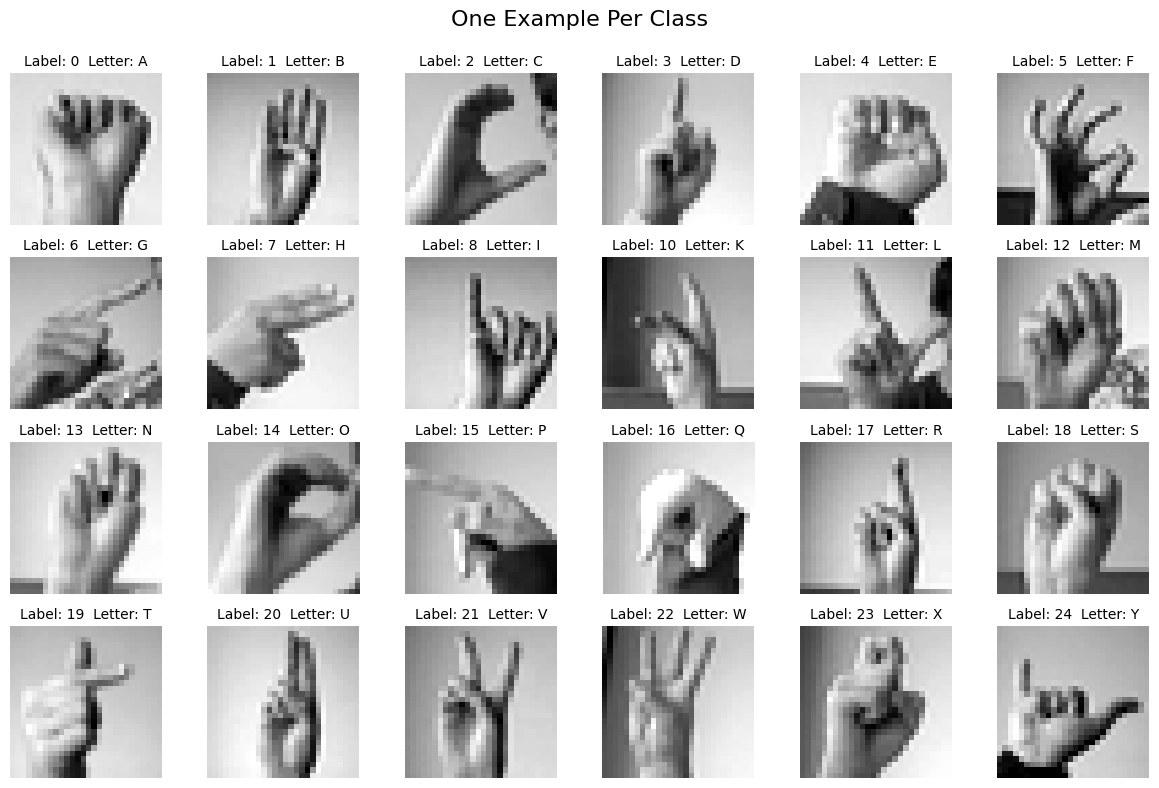

In [4]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8))
fig.suptitle('One Example Per Class', fontsize=16)

for i in range(24):  # Only 24 letters (J and Z excluded)
    label = i if i < 9 else i + 1  # skip label 9 (J)
    letter = chr(label + 65)  # Convert label to uppercase letter (0 → A, 1 → B, etc.)

    image = df_train[df_train['label'] == label].iloc[0, 1:].values.reshape(28, 28)
    ax = axes[i // 6, i % 6]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}  Letter: {letter}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

Displays which label each letter is assigned to and displays the actual ASL images.

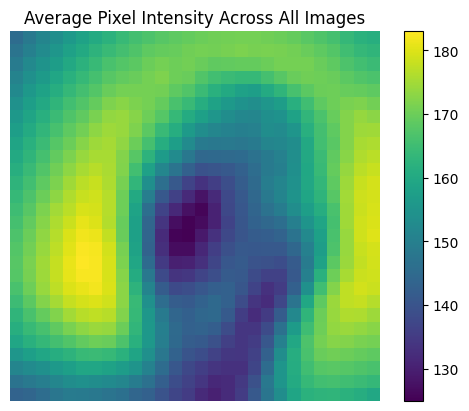

In [5]:
avg_image = df_train.iloc[:, 1:].mean().to_numpy().reshape(28, 28)
plt.imshow(avg_image, cmap='viridis')
plt.title('Average Pixel Intensity Across All Images')
plt.axis('off')
plt.colorbar()
plt.show()

Unique visualization that shows how the pixels are distributed to display that there are patterns for the models to interpret.

## 3. Data Cleaning / Scaling

In [6]:
# Get feature matrices and target arrays

X_train = df_train.drop('label', axis=1)
Y_train = df_train['label']

X_test = df_test.drop('label', axis=1)
Y_test = df_test['label']

X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [7]:
# Scale features matrix to normal pixel values for modeling

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,0.741176,0.741176,0.745098,0.745098,0.752941,0.756863,0.756863,0.756863,0.756863,0.760784,...,0.517647,0.647059,0.388235,0.301961,0.203922,0.784314,0.917647,0.784314,0.870588,0.882353
27451,0.592157,0.603922,0.615686,0.619608,0.627451,0.631373,0.639216,0.643137,0.650980,0.654902,...,0.776471,0.776471,0.776471,0.776471,0.776471,0.768627,0.764706,0.764706,0.764706,0.760784
27452,0.682353,0.682353,0.682353,0.682353,0.682353,0.686275,0.686275,0.682353,0.678431,0.678431,...,0.474510,0.768627,0.819608,0.815686,0.807843,0.800000,0.796078,0.792157,0.784314,0.784314
27453,0.694118,0.709804,0.721569,0.725490,0.733333,0.741176,0.745098,0.749020,0.749020,0.745098,...,0.466667,0.219608,0.105882,0.227451,0.400000,0.309804,0.184314,0.250980,0.341176,0.364706


In [ ]:
# Save data to files

#X_train.to_csv('../data/processed/X_train_scaled.csv', index=False)
#X_test.to_csv('../data/processed/X_test_scaled.csv', index=False)
#Y_train.to_csv('../data/processed/Y_train.csv', index=False)
#Y_test.to_csv('../data/processed/Y_test.csv', index=False)